In [1]:
from load_config import load_config
from utils import model_from_config, load_newest, postprocess
from plotting.plotting import compare, make_visual
from evaluator import Evaluator
from datasets.preprocessor import Preprocessor_2p5D
import torch
from torchsummary import summary
import numpy as np

device='cuda'

In [2]:
config = load_config()
checkpoints_path = config['checkpoint_dir']

In [3]:
net = model_from_config(config).to(device)

In [4]:
model_parameters = filter(lambda p: p.requires_grad, net.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(f"{params:,}")

2,371,114


In [5]:
evaluator = Evaluator(config, net, device=device)

In [6]:
# dice = evaluator.evaluate_checkpoint(88200)

In [7]:
net = load_newest(checkpoints_path, net, device)

In [8]:
evaluator = Evaluator(config, net, device=device)

In [9]:
pre = Preprocessor_2p5D(config)

In [18]:
dp = pre.process(43)
vol, seg = dp.full_vol.flip((1,)), dp.full_seg.flip((1,))

In [19]:
pred = evaluator.evaluate(vol)

Total slices = 155
Processed slices = 151


In [21]:
%matplotlib ipympl

In [23]:
import matplotlib.pyplot as plt
# slider = make_visual(vol, seg)

In [24]:
processed = postprocess(pred)

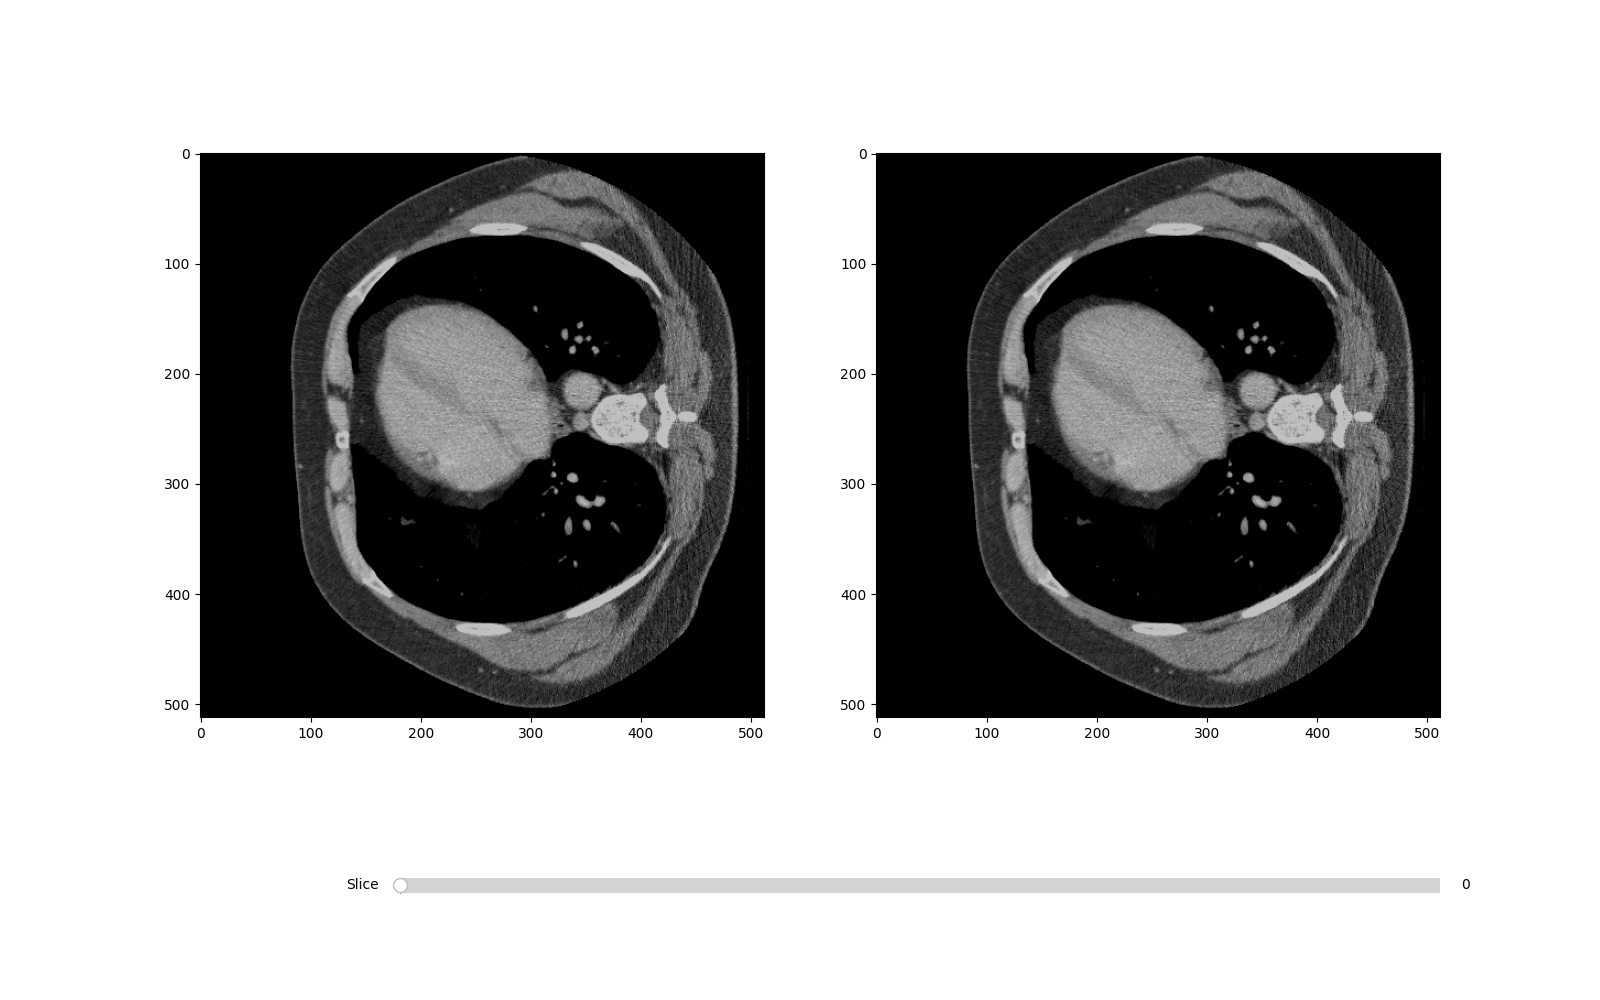

In [25]:
slider = compare(vol, seg, processed)

In [16]:
import matplotlib.pyplot as plt
plt.close()